# Programming Exercises

## 1. Data generating distribution and convergence of linear regression.

### (a) Generate a synthetic dataset with the following data generating process

In [1]:
# Import libraries
import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression as sk_OLS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import torch
import torch.nn.functional as F
import math

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [17]:
# function to generate a synthetic dataset with the data generating process
def data_gen(n):
    alpha = 20 
    beta = 0.5
    mx = 168
    sigmax = 30
    meps = 0
    sigmaeps = 20
    X = np.random.normal(mx,sigmax,n)
    epsilon = np.random.normal(meps,sigmaeps,n)
    Y = alpha + beta * X + epsilon
    return X, Y

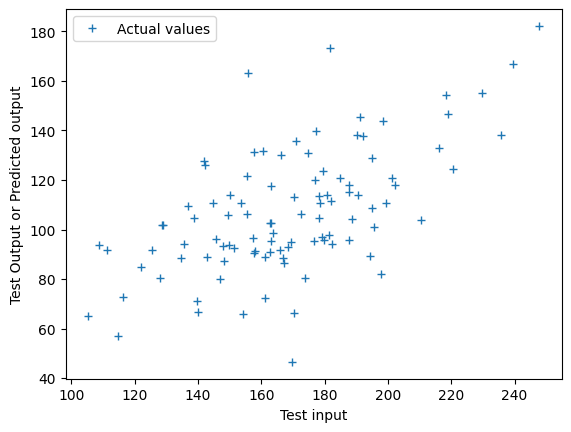

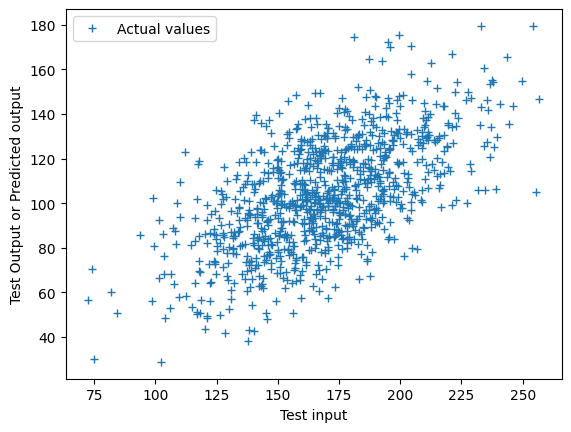

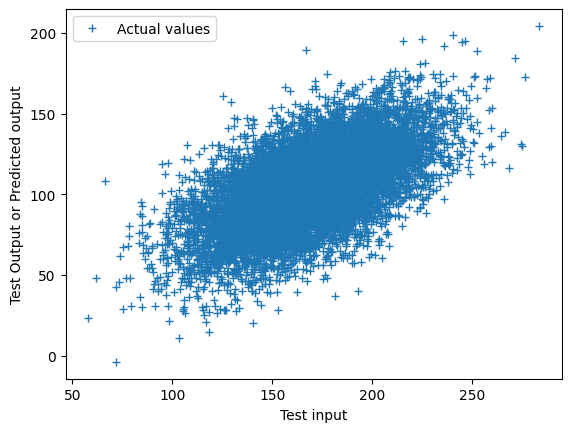

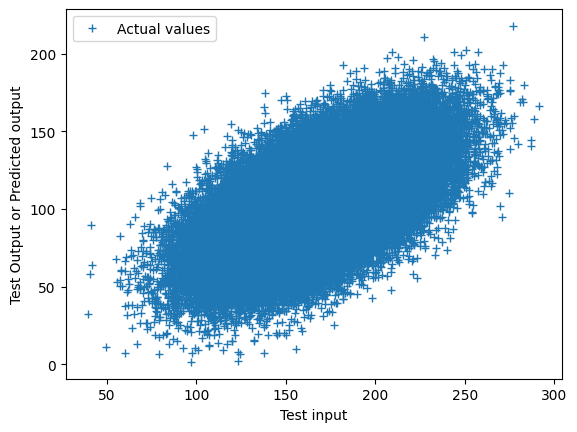

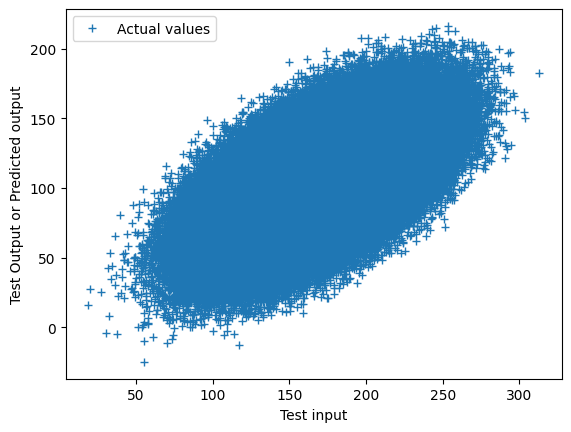

In [30]:
for i in range(5):
    X, Y = data_gen(pow(10,i+2))

    # Plot the regression line with actual data pointa
    plt.plot(X, Y, '+', label='Actual values')
    plt.xlabel('Test input')
    plt.ylabel('Test Output or Predicted output')
    plt.legend()
    plt.show()

In [28]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}
     
    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions
 
    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost
 
    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (train_output - predictions) * -1
        dm = np.mean(np.multiply(train_input, df))
        dc = np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives
 
    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']
 
    def train(self, train_input, train_output, learning_rate, iters):
        #initialize random parameters
        self.parameters['m'] = np.random.uniform(0,1) * -1
        self.parameters['c'] = np.random.uniform(0,1) * -1
         
        #initialize loss
        self.loss = []
         
        #iterate
        for i in range(iters):
            #forward propagation
            predictions = self.forward_propagation(train_input)
 
            #cost function
            cost = self.cost_function(predictions, train_output)
 
            #append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(i+1, cost))
 
            #back propagation
            derivatives = self.backward_propagation(train_input, train_output, predictions)
 
            #update parameters
            self.update_parameters(derivatives, learning_rate)
 
        return self.parameters, self.loss

In [34]:
np.random.uniform(0,1) * -1

-0.46302641308288206

Iteration = 1, Loss = 75181.84547098566
Iteration = 2, Loss = 6162178136.115251
Iteration = 3, Loss = 507424353112807.75
Iteration = 4, Loss = 4.17838437954034e+19
Iteration = 5, Loss = 3.4406894182544963e+24
Iteration = 6, Loss = 2.8332347140812333e+29
Iteration = 7, Loss = 2.333026312252059e+34
Iteration = 8, Loss = 1.9211298473114703e+39
Iteration = 9, Loss = 1.5819538214587655e+44
Iteration = 10, Loss = 1.3026594203042705e+49
Iteration = 11, Loss = 1.0726745258231856e+54
Iteration = 12, Loss = 8.832935304618881e+58
Iteration = 13, Loss = 7.273478041786108e+63
Iteration = 14, Loss = 5.989343406226544e+68
Iteration = 15, Loss = 4.9319231090852915e+73
Iteration = 16, Loss = 4.061190668854011e+78
Iteration = 17, Loss = 3.3441862908211146e+83
Iteration = 18, Loss = 2.7537692414898784e+88
Iteration = 19, Loss = 2.267590491651047e+93
Iteration = 20, Loss = 1.8672467396157958e+98
Iteration = 21, Loss = 1.537583791889688e+103
Iteration = 22, Loss = 1.2661229321885558e+108
Iteration = 23, Lo

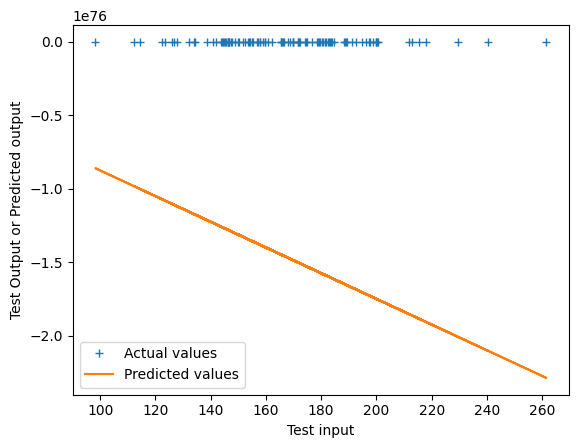

Iteration = 1, Loss = 22306.05217034418
Iteration = 2, Loss = 1837799147.1807435
Iteration = 3, Loss = 154232016117179.1
Iteration = 4, Loss = 1.2943481937329707e+19
Iteration = 5, Loss = 1.0862447945641675e+24
Iteration = 6, Loss = 9.115999538847228e+28
Iteration = 7, Loss = 7.650342538636109e+33
Iteration = 8, Loss = 6.4203317155790844e+38
Iteration = 9, Loss = 5.388080223845691e+43
Iteration = 10, Loss = 4.521792608963124e+48
Iteration = 11, Loss = 3.7947854428715194e+53
Iteration = 12, Loss = 3.1846654198348317e+58
Iteration = 13, Loss = 2.672639596882513e+63
Iteration = 14, Loss = 2.2429365327786256e+68
Iteration = 15, Loss = 1.8823204954162587e+73
Iteration = 16, Loss = 1.5796837742326834e+78
Iteration = 17, Loss = 1.3257045400348677e+83
Iteration = 18, Loss = 1.1125597136191049e+88
Iteration = 19, Loss = 9.336839989517339e+92
Iteration = 20, Loss = 7.835676586407104e+97
Iteration = 21, Loss = 6.575868027694714e+102
Iteration = 22, Loss = 5.518609636425199e+107
Iteration = 23, Lo

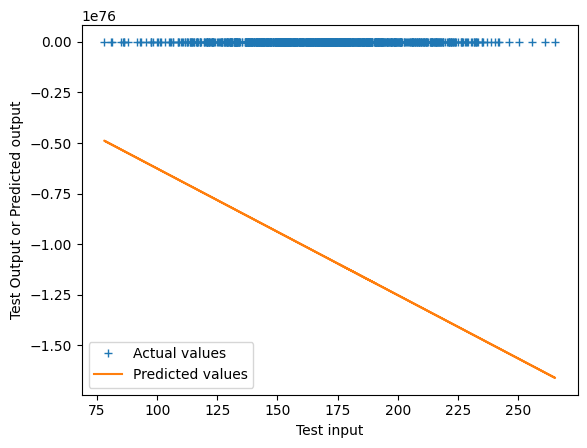

Iteration = 1, Loss = 68144.07530263564
Iteration = 2, Loss = 5705349226.028086
Iteration = 3, Loss = 480511804544783.75
Iteration = 4, Loss = 4.046932123100421e+19
Iteration = 5, Loss = 3.4083782030102783e+24
Iteration = 6, Loss = 2.870579891479763e+29
Iteration = 7, Loss = 2.4176392473376934e+34
Iteration = 8, Loss = 2.0361668203752815e+39
Iteration = 9, Loss = 1.714885843685213e+44
Iteration = 10, Loss = 1.444298879366832e+49
Iteration = 11, Loss = 1.2164070632582563e+54
Iteration = 12, Loss = 1.0244736492444277e+59
Iteration = 13, Loss = 8.628248632368916e+63
Iteration = 14, Loss = 7.266821798382242e+68
Iteration = 15, Loss = 6.120210635949774e+73
Iteration = 16, Loss = 5.154519990669304e+78
Iteration = 17, Loss = 4.341202928236523e+83
Iteration = 18, Loss = 3.656216853993083e+88
Iteration = 19, Loss = 3.079312785973213e+93
Iteration = 20, Loss = 2.5934367715367584e+98
Iteration = 21, Loss = 2.184225752770772e+103
Iteration = 22, Loss = 1.8395829778568502e+108
Iteration = 23, Loss 

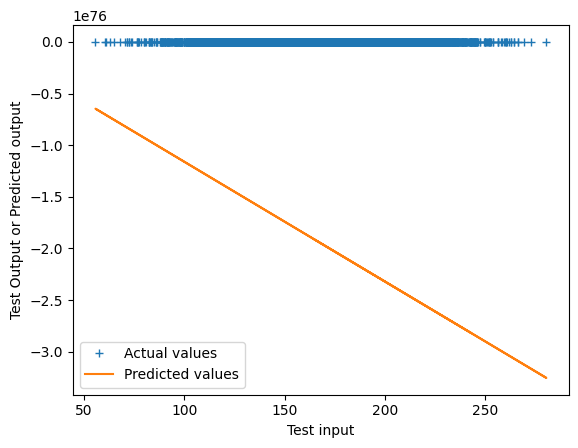

Iteration = 1, Loss = 67685.27678614478
Iteration = 2, Loss = 5655543070.856244
Iteration = 3, Loss = 475457728542437.6
Iteration = 4, Loss = 3.997141659124515e+19
Iteration = 5, Loss = 3.3603705406371355e+24
Iteration = 6, Loss = 2.8250412753335344e+29
Iteration = 7, Loss = 2.3749935046820545e+34
Iteration = 8, Loss = 1.99664132221077e+39
Iteration = 9, Loss = 1.6785631462572203e+44
Iteration = 10, Loss = 1.4111569287032472e+49
Iteration = 11, Loss = 1.1863502912401161e+54
Iteration = 12, Loss = 9.973568388448724e+58
Iteration = 13, Loss = 8.384712941325574e+63
Iteration = 14, Loss = 7.048972681618864e+68
Iteration = 15, Loss = 5.926024684913504e+73
Iteration = 16, Loss = 4.981969735501805e+78
Iteration = 17, Loss = 4.188308987075743e+83
Iteration = 18, Loss = 3.5210836481431445e+88
Iteration = 19, Loss = 2.960151721250461e+93
Iteration = 20, Loss = 2.4885799624337267e+98
Iteration = 21, Loss = 2.092132705552847e+103
Iteration = 22, Loss = 1.7588421202923033e+108
Iteration = 23, Loss 

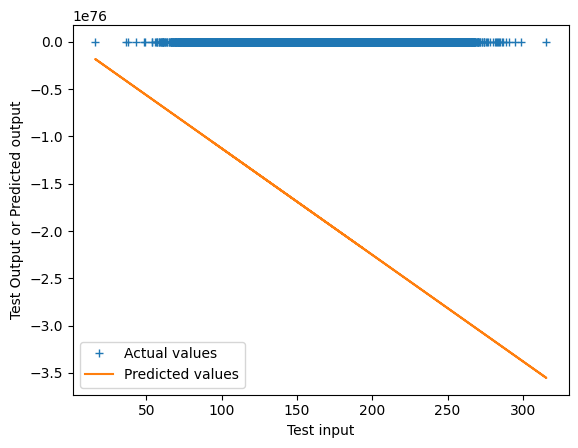

Iteration = 1, Loss = 28458.156787445918
Iteration = 2, Loss = 2364248054.3083797
Iteration = 3, Loss = 199311065011442.38
Iteration = 4, Loss = 1.6802343352386435e+19
Iteration = 5, Loss = 1.4164729997095856e+24
Iteration = 6, Loss = 1.1941166281555016e+29
Iteration = 7, Loss = 1.0066655149302643e+34
Iteration = 8, Loss = 8.48640271022044e+38
Iteration = 9, Loss = 7.154216558717209e+43
Iteration = 10, Loss = 6.031155522160466e+48
Iteration = 11, Loss = 5.084391370312227e+53
Iteration = 12, Loss = 4.286249212364064e+58
Iteration = 13, Loss = 3.613398531388692e+63
Iteration = 14, Loss = 3.046171209312542e+68
Iteration = 15, Loss = 2.5679866075770228e+73
Iteration = 16, Loss = 2.1648668980044637e+78
Iteration = 17, Loss = 1.8250284764909493e+83
Iteration = 18, Loss = 1.5385375161277075e+88
Iteration = 19, Loss = 1.2970195912141163e+93
Iteration = 20, Loss = 1.0934148841734177e+98
Iteration = 21, Loss = 9.217718198171783e+102
Iteration = 22, Loss = 7.770730946756654e+107
Iteration = 23, L

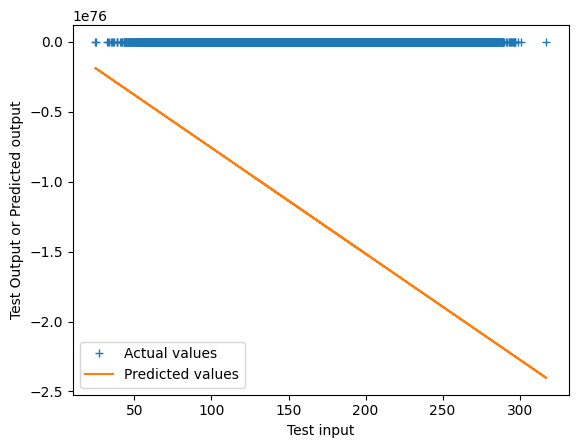

In [32]:
from sklearn.metrics import r2_score

for i in range(5):
    X, Y = data_gen(pow(10,i+2))
    # Example usage
    linear_reg = LinearRegression()
    parameters, loss = linear_reg.train(X, Y, 0.01, 30)

    # Prediction on the data
    y_pred = X * parameters['m'] + parameters['c']

    # calculate the R2 score
    r2 = r2_score(Y, y_pred)
    print(f"R2 Score: {r2}")

    # Plot the regression line with actual data pointa
    plt.plot(X, Y, '+', label='Actual values')
    plt.plot(X, y_pred, label='Predicted values')
    plt.xlabel('Test input')
    plt.ylabel('Test Output or Predicted output')
    plt.legend()
    plt.show()
    

In [ ]:


 
# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()

In [55]:
# import packages

import os
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression as sk_OLS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import torch
import torch.nn.functional as F
import math

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

# Part (a): Download the data

In [45]:
#====================================================#
# YOUR CODE HERE:
#   Import train and test csv files.
#   You should use the pd.read_csv function.
#   You should set the index_col parameter to equal 'id'.
#====================================================#

# Read data and set index column
train_data = pd.read_csv('./data/train.csv', index_col='id')
test_data  = pd.read_csv('./data/test.csv', index_col='id')

#====================================================#
# END YOUR CODE
#====================================================#


In [46]:
print(train_data.columns)
print(test_data.columns)

Index(['keyword', 'location', 'text', 'target'], dtype='object')
Index(['keyword', 'location', 'text'], dtype='object')


In [64]:
#====================================================#
# YOUR CODE HERE:
#   Get the index values for X_train and y_train.
#   Get the data values for X_train and y_train.
#   Get the index values for X_test.
#   Get the index values for y_test.
#====================================================#

# Get train indices
X_train_id = train_data.index
Y_train_id = train_data.index 

# Get train data
X_train = train_data[['keyword', 'location', 'text']]
Y_train = train_data['target']

# Get test indices
X_test_id = test_data.index

# Get test data
X_test = test_data[['keyword', 'location', 'text']]

#====================================================#
# END YOUR CODE
#====================================================#

print(f"Train Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

print(f"Number of labels = 1 in train dataset as percentage: {((Y_train == 1).sum() / (X_train.shape[0])) * 100:0.2f}%")
print(f"Number of labels = 0 in train dataset as percentage: {((Y_train == 0).sum() / (X_train.shape[0])) * 100:0.2f}%")

Train Data Shape: (7613, 3)
Test Data Shape: (3263, 3)
Number of labels = 1 in train dataset as percentage: 42.97%
Number of labels = 0 in train dataset as percentage: 57.03%


### Part (a), Question 1: How many training and test data points are there?

### Answer: There are total of 7613 training data points and 3263 test data points.

### Part (a), Question 2: what percentage of the training tweets are of real disasters, and what percentage is not?

### Answer: 42.97% is real disasters and 57.03% is not.

# Part (b): Split the training data.

In [71]:
#====================================================#
# YOUR CODE HERE:
#  You should use the sklearn.model_selection.train_test_split
#     parameter to perform the train/development split
#   Set the test_size to 0.30.
#   Set the random_stat parameter to 42.
#====================================================#

X_train_orig, X_develop_orig, y_train_orig, y_develop_orig = train_test_split(train_data[['keyword', 'location', 'text']], train_data['target'], test_size=0.30, random_state=42)
# Output the result
print("X_train_orig shape: ", X_train_orig.shape)
print("X_develop_orig shape: ", X_develop_orig.shape)
print("y_train_orig shape: ", y_train_orig.shape)
print("y_develop_orig shape: ", y_develop_orig.shape)

# Save the training data into a csv file
train_data_to_save = X_train_orig.copy()
train_data_to_save['target'] = y_train_orig
train_data_to_save.to_csv('train_data.csv', index=False)

# Save the development data into a csv file
develop_data_to_save = X_develop_orig.copy()
develop_data_to_save['target'] = y_develop_orig
develop_data_to_save.to_csv('./data/develop_data.csv', index=False)
#====================================================#
# END YOUR CODE
#====================================================#

X_train_orig shape:  (5329, 3)
X_develop_orig shape:  (2284, 3)
y_train_orig shape:  (5329,)
y_develop_orig shape:  (2284,)


# Part (c): Preprocess the data.

In [72]:
#=======================================================================+#
# YOUR CODE HERE:
#  You should complete the following function to obtain the pre-processed
#  X_train and X_develop
#  Note that we suggest you to do every sub-question in a dedicated Python
#  function to make the code more structured and less error-prone.
#  With a function, you can clearly test each part when you encounter an error.
#  You can also create your own simple input data (e.g. just one sample) to
#  test the correctness of a function.

#========================================================================#
def pre_process(data):
    lemmatizer = WordNetLemmatizer()    
    stop_words = set(stopwords.words('english'))
        
    def clean_text(text):
        # Convert all the words to lowercase (Helps in achieving uniformity)
        text = text.lower()
        
        # Lemmatize all the words (Aids in reducing the dimensionality of the data and capturing semantic meanings)
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
        
        # Strip punctuation (Removes unnecessary noise from the data)
        text = re.sub(r'[^\w\s]', '', text)
        
        # Strip the stop words (Helps in focusing on significant words, though sometimes it might remove context)
        text = ' '.join([word for word in text.split() if word not in stop_words])
        
        # Strip @ and URLs (Helps in removing references to users and external links which might not be necessary for analysis)
        text = re.sub(r'@\w+|http\S+', '', text)
        
        return text

    data['text'] = data['text'].apply(clean_text)
    return data # Feel free to change the variable name
    #========================================================================#
    #  This function should return the pre-processed data
    #========================================================================#

# get the preprocessed data
# Get the preprocessed data
X_train_preproc   = pre_process(X_train_orig)
X_develop_preproc = pre_process(X_develop_orig)

# Output the result (if you want to check the initial results)
print("Preprocessed X_train data:")
print(X_train_preproc.head())

print("Preprocessed X_develop data:")
print(X_develop_preproc.head())

Preprocessed X_train data:
                 keyword                location  \
id                                                 
1707   bridge%20collapse                     NaN   
5789                hail  Carol Stream, Illinois   
7789              police                Houston    
8257             rioting                     NaN   
10656             wounds          Lake Highlands   

                                                    text  
id                                                        
1707   ash 2015 australiaûªs collapse trent bridge am...  
5789   great michigan technique camp b1g thanks bmurp...  
7789   cnn tennessee movie theater shooting suspect k...  
8257                still rioting couple hour left class  
10656  crack path wiped morning beach run surface wou...  
Preprocessed X_develop data:
          keyword               location  \
id                                         
3796  destruction                    NaN   
3185       deluge                 

# Part (d): Bag of words model.

In [73]:
D

Total number of features: 1937
   05  06  10  100  1000  101  11  11yearold  12  12000  ...  youve  yr  yyc  \
0   0   0   0    0     0    0   0          0   0      0  ...      0   0    0   
1   0   0   0    0     0    0   0          0   0      0  ...      0   0    0   
2   0   0   0    0     0    0   0          0   0      0  ...      0   0    0   
3   0   0   0    0     0    0   0          0   0      0  ...      0   0    0   
4   0   0   0    0     0    0   0          0   0      0  ...      0   0    0   

   zionist  zombie  zone  û_  ûïwhen  ûò  ûó  
0        0       0     0   0       0   0   0  
1        0       0     0   0       0   0   0  
2        0       0     0   0       0   0   0  
3        0       0     0   0       0   0   0  
4        0       0     0   0       0   0   0  

[5 rows x 1937 columns]
   05  06  10  100  1000  101  11  11yearold  12  12000  ...  youve  yr  yyc  \
0   0   0   0    0     0    0   0          0   0      0  ...      0   0    0   
1   0   0   0    0   

# Part (e): Logistic regression.

In [82]:
# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Transform the text data to bag of words feature vectors
X_train_vectorized = vectorizer.fit_transform(X_train_preproc['text'])
X_develop_vectorized = vectorizer.transform(X_develop_preproc['text'])

def logistic_without_regularization(X_train, Y_train, X_develop, Y_develop):
    # Initialize your logistic regression model
    model = LogisticRegression(penalty='none', max_iter=1000)

    # Fit your model to the train data
    model.fit(X_train, Y_train)

    # Generate your prediction for the training set
    y_train_no_reg = model.predict(X_train)

    # Generate your prediction for the development set
    y_develop_no_reg = model.predict(X_develop)

    # Return the predictions
    return y_train_no_reg, y_develop_no_reg

# Call the function and get predictions
y_train_no_reg, y_develop_no_reg = logistic_without_regularization(X_train_vectorized, y_train_orig, X_develop_vectorized, y_develop_orig)

# Get the F1 train and develop scores
F1_train_no_reg = f1_score(y_train_orig, y_train_no_reg)
F1_develop_no_reg = f1_score(y_develop_orig, y_develop_no_reg)

# Print the F1 train and develop scores
print(f"F1 for training set: {F1_train_no_reg:.2f}")
print(f"F1 for development set: {F1_develop_no_reg:.2f}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


F1 for training set: 0.99
F1 for development set: 0.71


In [ ]:
# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Transform the text data to bag of words feature vectors
X_train_vectorized = vectorizer.fit_transform(X_train_preproc['text'])
X_develop_vectorized = vectorizer.transform(X_develop_preproc['text'])

def logistic_L1_regularization(X_train, Y_train, X_develop, Y_develop):
    cs = l1_min_c(X_train, Y_train, loss='log') * np.logspace(0, 10, 16)

    clf = LogisticRegression(
        penalty='l1',
        solver='liblinear',
        tol=1e-6,
        max_iter=int(1e6),
        warm_start=True,
        intercept_scaling=10000.0,
    )
    
    best_score = 0
    best_c = 0
    for c in cs:
        clf.set_params(C=c)
        clf.fit(X_train, Y_train)
        
        y_develop_L1_reg = clf.predict(X_develop)
        score = f1_score(Y_develop, y_develop_L1_reg)
        
        if score > best_score:
            best_score = score
            best_c = c

    clf.set_params(C=best_c)
    clf.fit(X_train, Y_train)
    
    y_train_L1_reg = clf.predict(X_train)
    y_develop_L1_reg = clf.predict(X_develop)
    
    return y_train_L1_reg, y_develop_L1_reg

# Get predictions
y_train_L1_reg, y_develop_L1_reg = logistic_L1_regularization(X_train_vectorized, y_train_orig, X_develop_vectorized, y_develop_orig)

# Get the F1 train and develop scores
F1_train_L1_reg = f1_score(y_train_orig, y_train_L1_reg)
F1_develop_L1_reg = f1_score(y_develop_orig, y_develop_L1_reg)

# Print the F1 train and develop scores
print(f"F1 for training set: {F1_train_L1_reg:.2f}")
print(f"F1 for development set: {F1_develop_L1_reg:.2f}")

In [ ]:
#=======================================================================+#
# YOUR CODE HERE:
#  You should complete the following function for logistic regression
#  with L2 regularization.
#  You will be training logistic regression models using bag of words
#  feature vectors obtained in part (d).
#========================================================================#
def logistic_L2_regularization(X_train, Y_train, X_develop, Y_develop):
    # initialize your logistic regression model

    # then fit your model to the train data

    # then generate your prediction for the training set
    y_train_L2_reg =

    # then generate your prediction for the development set
    y_develop_L2_reg =
    #========================================================================#
    #  This function should train a logistic regression model without
    #  regularization terms.
    #  Report the F1 score in your training and in your development sets.
    #========================================================================#
    return y_train_L2_reg, y_develop_L2_reg

# get the F1 train and develop scores
F1_train_L2_reg = sklearn.metrics.f1_score(y_train, y_train_L2_reg)
F1_develop_L2_reg = sklearn.metrics.f1_score(y_develop, y_develop_L2_reg)

# print the F1 train and develop scores
print(f"F1 for training set: {F1_train_L2_reg:.2f}")
print(f"F1 for development set: {F1_develop_L2_reg:.2f}")

### Which one of the three classifiers performed the best on your training and development set? Did you observe any overfitting and did regularization help reduce it? Support your answers with the classifier performance you got.

### Answer:

### Inspect the weight vector of the classifier with L1 regularization (in other words, look at the θ you got after training). You can access the weight vector of the trained model using the coef_attribute of a LogisticRegression instance. What are the most important words for deciding whether a tweet is about a real disaster or not? You might need to run some code (feel free to insert a code cell below).

### Answer:

# Part (f): Bernoulli Naive Bayes.

In [ ]:
class BernoulliNB(object):
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        #====================================================#
        # YOUR CODE HERE:
        #  You should build the Bernoully NB model from scratch
        #  Do not use sklearn, use numpy and other basic packages
        #    only.
        #  Please update and save the parameters
        #    "self.class_log_prior_" and "self.feature_prob_"
        #  These variables are just a suggestion to help
        #    structure your code - you do not need to use them
        #    if you would prefer not to
        #====================================================#
        self.class_log_prior_ =
        self.feature_prob_ =
        #====================================================#
        # END YOUR CODE
        #====================================================#
        return self

    def predict(self, X):
        #====================================================#
        # YOUR CODE HERE:
        #  You should build the Bernoully NB model from scratch
        #  Do not use sklearn, use numpy and other basic packages
        #    only.
        #  Please update and save the parameters
        #    "self.pred_log_prob_" and "y_pred"
        #  These variables are just a suggestion to help
        #    structure your code - you do not need to use them
        #    if you would prefer not to
        #====================================================#
        self.pred_log_prob_ =
        y_pred =
        #====================================================#
        # END YOUR CODE
        #====================================================#
        return y_pred

# get the predictions y_train_NB and y_develop_NB
nb = BernoulliNB(alpha=1)
nb.fit(X_train, y_train)
y_train_NB = nb.predict(X_train) # prediction from X_train using model
y_develop_NB = nb.predict(X_develop) # prediction from X_develop using model

# get the F1 train and develop scores
F1_train_NB = sklearn.metrics.f1_score(y_train, y_train_NB)
F1_develop_NB = sklearn.metrics.f1_score(y_develop, y_develop_NB)

# print the F1 train and develop scores
print(f"F1 for training set: {F1_train_NB:.2f}")
print(f"F1 for development set: {F1_develop_NB:.2f}")

# Part (g): Model comparison.

Question: Which model performed the best in predicting whether a tweet is of a real disaster or not? Include your performance metric in your response. Comment on the pros and cons of using generative vs discriminative models.

Answer:

Question: hink about the assumptions that Naive Bayes makes. How are the assumptions different from logistic regressions? Discuss whether it is valid and efficient to use Bernoulli Naive Bayes classifier for natural language texts.

Answer:

# Part (h): N-gram model.

In [ ]:
#=======================================================================+#
# YOUR CODE HERE:
#  Featurized the preprocessed data: X_train_preproc and X_develop_preproc
#  using the N=2 gram model
#========================================================================#
def n_gram(data):

    #========================================================================#
    # END CODE HERE
    #  This function should return the new data whose "text" feature contains
    #  only 0 and 1
    #========================================================================#
    return n_gram_data # Feel free to change the variable name

# get the featurized data
X_train_gram   = bag_of_word(X_train_preproc)
X_develop_gram = bag_of_word(X_develop_preproc)

#=======================================================================+#
# YOUR CODE HERE:
#  Use the functions you already defined "X_train_gram" and "X_develop_gram"
#  to re-run:
#  Logistic Regression with no regularization Model
#  Logistic Regression with L1 regularization Model
#  Logistic Regression with L2 regularization Model
#========================================================================#
y_train_gram_no_reg, y_develop_gram_no_reg =
y_train_gram_L1_reg, y_develop_gram_L1_reg =
y_train_gram_L2_reg, y_develop_gram_L2_reg =
y_train_gram_NB =
y_develop_gram_NB =
#========================================================================#
# END CODE HERE
#========================================================================#

# get the F1 train and develop scores for no regularization model
F1_train_gram_no_reg = sklearn.metrics.f1_score(y_train, y_train_gram_no_reg)
F1_develop_gram_no_reg = sklearn.metrics.f1_score(y_develop, y_develop_gram_no_reg)
# get the F1 train and develop scores for L1 regularization model
F1_train_gram_L1_reg = sklearn.metrics.f1_score(y_train, y_train_gram_L1_reg)
F1_develop_gram_L1_reg = sklearn.metrics.f1_score(y_develop, y_develop_gram_L1_reg)
# get the F1 train and develop scores for L2 regularization model
F1_train_gram_L2_reg = sklearn.metrics.f1_score(y_train, y_train_gram_L2_reg)
F1_develop_gram_L2_reg = sklearn.metrics.f1_score(y_develop, y_develop_gram_L2_reg)
# get the F1 train and develop scores for Bernoulli NB model
F1_train_gram_NB = sklearn.metrics.f1_score(y_train, y_train_gram_NB)
F1_develop_gram_NB = sklearn.metrics.f1_score(y_develop, y_develop_gram_NB)

# print the F1 train and develop scores for no regularization model
print(f"F1 for training set: {F1_train_gram_NB:.2f}")
print(f"F1 for development set: {F1_develop_gram_NB:.2f}")
# print the F1 train and develop scores for L1 regularization model
print(f"F1 for training set: {F1_train_gram_L1_reg:.2f}")
print(f"F1 for development set: {F1_develop_gram_L1_reg:.2f}")
# print the F1 train and develop scores for L2 regularization model
print(f"F1 for training set: {F1_train_gram_L2_reg:.2f}")
print(f"F1 for development set: {F1_develop_gram_L2_reg:.2f}")
# print the F1 train and develop scores for Bernoulli NB model
print(f"F1 for training set: {F1_train_gram_NB:.2f}")
print(f"F1 for development set: {F1_develop_gram_NB:.2f}")

# Part (i): Determine performance with the test set.

In [ ]:
#=======================================================================+#
# YOUR CODE HERE:
#  Re-build your feature vectors on the entire Kaggle train set
#  (i.e. DO NOT split the train set into a further train set and development set)
#========================================================================#

#========================================================================#
# END CODE HERE
#========================================================================#

In [ ]:
#=======================================================================+#
# YOUR CODE HERE:
#  Re-train your preferred classifier (see below) on the entire train set
#  (i.e. DO NOT split the train set into a further train set and development set)
#  Your preferred classifier may inculde either bag of word or n-gram,
#  and using either logistic regression or Bernoulli naive bayes
#========================================================================#

#========================================================================#
# END CODE HERE
#========================================================================#

In [ ]:
#=======================================================================+#
# YOUR CODE HERE:
#  Report the resulting F 1-score on the test data, as reported by Kaggle
#========================================================================#

#========================================================================#
# END CODE HERE
#========================================================================#